In [2]:
import pandas as pd
import numpy as np
from dataCleaning import *
from dataAnalysis import *
from parameterTuning import *
from parameterTuning import *
from regression_models import *
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

from sklearn.exceptions import DataConversionWarning
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DataConversionWarning)

In [3]:
column_names = {"id", "song", "artist", "duration_ms", "danceability", "energy", "key", "loudness", "mode", "loudness", "mode", "speechiness", "acousticness", 
                "instrumentalness", "liveness", "valence", "tempo", "popularity",  "popularity", "artist_followers", "number_of_artists", "number_of_markets"}
target_column = {"clusters_popularity", "popularity"}
popularity = {"popularity"}

string_columns = {"id", "song", "artist"}


df = pd.read_csv("datasets_kaggle/dataset_unido_anyadidos.csv", sep = ";")

In [4]:
df = preprocess(df, target_column)
df = df.drop(columns = string_columns)
df = create_clusters(df)

In [5]:
# Create the RFE model and select all features
model = DecisionTreeRegressor()
rfe = RFE(model,n_features_to_select= 9)

In [6]:
rfe.fit(df.drop(columns = target_column), df[popularity])

selected_columns = df.drop(columns = target_column).columns[rfe.support_]
y = df["clusters_popularity"]
x = df[selected_columns]

scaler = std_scaler(x)

In [7]:
print(y.head())
print(x.head())

0    Very unpopular
1           Popular
2           Average
3           Popular
4         Unpopular
Name: clusters_popularity, dtype: category
Categories (5, object): ['Very unpopular' < 'Unpopular' < 'Average' < 'Popular' < 'Very popular']
   duration_ms  danceability  loudness  speechiness  acousticness  liveness  \
0       204600         833.0    -8.795     431.0000        0.0102  165.0000   
1       326933         743.0   -10.401       0.0794      199.0000  137.0000   
2       185707         838.0    -7.148     289.0000        0.0344  159.0000   
3       199413         494.0   -15.236       0.0261      604.0000    0.0922   
4       392893         678.0   -11.648       0.0694        0.1800  439.0000   

   valence  artist_followers  number_of_markets  
0   286.00        12489395.0                1.0  
1   588.00        10020401.0              183.0  
2   173.00        12489395.0              183.0  
3     0.23         1675703.0              183.0  
4   904.00           79632.0      

In [20]:
#select 100 random samples from x
x_sample = x.sample(n=10000, random_state=1)


In [21]:
# hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(x_sample, method='ward', metric='euclidean')


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [10.0, 10.0, 25.0, 25.0],
  [17.5, 17.5, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [26.25, 26.25, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [70.0, 70.0, 85.0, 85.0],
  [38.125, 38.125, 77.5, 77.5],
  [95.0, 95.0, 105.0, 105.0],
  [100.0, 100.0, 115.0, 115.0],
  [57.8125, 57.8125, 107.5, 107.5],
  [125.0, 125.0, 135.0, 135.0],
  [145.0, 145.0, 155.0, 155.0],
  [130.0, 130.0, 150.0, 150.0],
  [165.0, 165.0, 175.0, 175.0],
  [140.0, 140.0, 170.0, 170.0],
  [185.0, 185.0, 195.0, 195.0],
  [190.0, 190.0, 205.0, 205.0],
  [197.5, 197.5, 215.0, 215.0],
  [206.25, 206.25, 225.0, 225.0],
  [155.0, 155.0, 215.625, 215.625],
  [82.65625, 82.65625, 185.3125, 185.3125],
  [235.0, 235.0, 245.0, 245.0],
  [240.0, 240.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [247.5, 247.5, 270.0, 270.0],
  [285.0, 285.0, 295.0, 295.0],
  [290.0, 290.0, 305.0, 305.0],
  [258.75, 258.75, 297.5, 297.5],
  [315.0, 315.0, 325.0, 325.0],
  [320.0, 320.0, 335.0, 335.0],
  [2

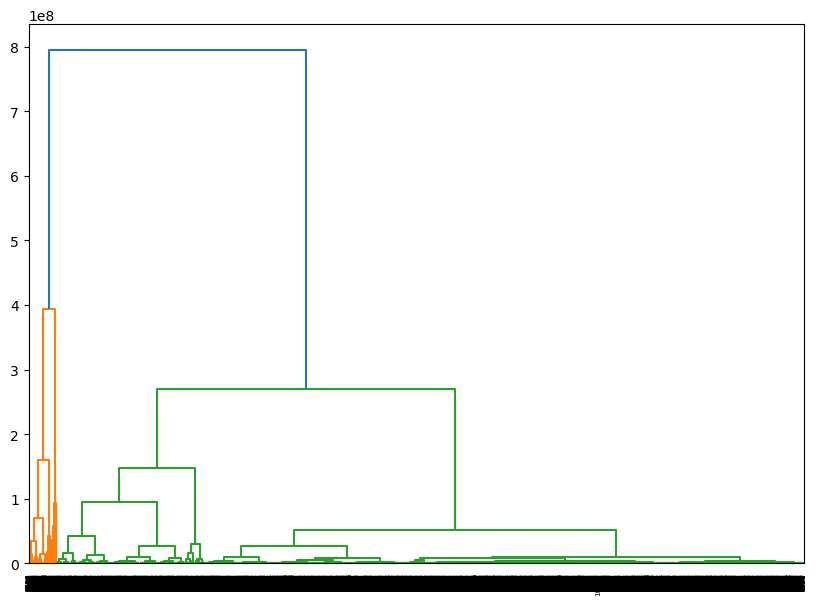

In [23]:

labelList = range(1, 10001)

plt.figure(figsize=(10, 7))

dendrogram(linked, orientation='top', labels=labelList, distance_sort='descending', show_leaf_counts=True)

In [ ]:

# Special imports
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=None, affinity='euclidean', linkage='ward', compute_full_tree=True, distance_threshold=200)

# Cluster the data
cluster.fit_predict(x)

print(f"Number of clusters = {1+np.amax(cluster.labels_)}")

# Display the clustering, assigning cluster label to every datapoint 
print("Classifying the points into clusters:")
print(cluster.labels_)

# Display the clustering graphically in a plot
plt.scatter(x_sample[:,0],x_sample[:,1], c=cluster.labels_, cmap='rainbow')
plt.title(f"SK Learn estimated number of clusters = {1+np.amax(cluster.labels_)}")
plt.show()

print(" ")